<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Gradient Descent: Iteratively Minimizing Loss Functions 

_Authors: Kiefer Katovich (SF)_

---

### Learning Objectives

- Review derivatives and partial derivatives.
- Review the least squared loss function for regression.
- Understand how gradient descent minimizes the loss function.
- Manually code the gradient descent algorithm for simple linear regression from scratch.
- Learn how the gradient descent code changes for multiple linear regression.
- Visualize gradient descent optimizing the coefficients of a regression.
- Understand the pitfalls of gradient descent and observe when it can fail.
- Understand how stochastic gradient descent is different and what its benefits are.


### Lesson Guide
- [Introduction to Gradient Descent](#intro)
- [Review of Derivatives](#derivatives)
- [Review of the Least Squares Loss Function for Regression](#lsq-loss)
    - [Exercise 1: Code the Loss Function](#exercise-1)
- [Partial Derivatives of the Loss Function](#partial-derivatives)
    - [Partial Derivative With Respect to $\beta_0$](#beta0)
    - [Partial Derivative With Respect to $\beta_1$](#beta1)
    - [Exercise 2: Code the Partial Derivative Functions](#exercise-2)
    - [Iterating Toward the Minimum](#iterating)
- [Coding the Gradient Descent Algorithm for SLR](#code-descent)
    - [Exercise 3: Code the Beta Coefficient Update](#exercise-3)
    - [Exercise 4: Code the Gradient Descent Iterator](#exercise-4)
- [Exercise 5: Test the Gradient Descent Algorithm on the Simple Housing Data](#exercise-5)
- [Linear Algebra MLR Generalization of Gradient Descent](#linalg)
- [Interactive Visualization of Gradient Descent](#interactive)
- [Gradient Descent can Fail: A Toy Example](#fail)
- [Stochastic Gradient Descent](#stochastic)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<a id='intro'></a>

## Introduction to Gradient Descent

---

Gradient descent is an algorithm used to minimize functions, such as the least squares loss, in regression. It's popular in machine learning and statistics.

The gradient descent algorithm uses the derivative of the loss function to move in the direction where the loss function is descending.

<a id='derivatives'></a>
## Derivatives
---

The derivative of a function quantifies the **rate of change** of the the function with respect to another quantity. 

Imagine the derivative as a tangent line on the edge of another function. For example, in the image below, if the black curve was the velocity of a car, the red tangent would represent the derivative of velocity at that point (the acceleration of the car).

![derivative](https://camo.githubusercontent.com/2f70b084174b825e3ad88564301f9aaf46997fd3/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f302f30662f54616e67656e745f746f5f615f63757276652e737667)



The value of the derivative of a function indicates whether the function is **increasing or decreasing** at that point/input value. 

* If the function is not changing (the tangent line is flat), **the derivative is 0**.
* If the function is increasing (the tangent slope is positive), **the derivative is positive**.
* If the function is decreasing (the tangent slope is negative), **the derivative is negative**.

**In the case of convex loss functions such as the least squares loss, the minimum is the point where the derivative is 0.**

<a id='lsq-loss'></a>

## Review: The Least Squares Loss Function for Regression

---

Recall the least squares loss function:

### $$\frac{1}{N}\sum_{i=1}^N{\left(y_i - \hat{y}_i\right)^2}$$

As well as the formula for a linear regression with a single predictor variable:

### $$y = \beta_0 + \beta_1x_1$$

We can redefine the loss function by inserting the regression formula:

### $$\frac{1}{N}\sum_{i=1}^N{\left(y_i - (\beta_0 + \beta_1x_i)\right)^2}$$

<a id='exercise-1'></a>
### Exercise 1: Code the Loss Function

Write a Python function for the least squares loss of this simple linear regression in terms of:
- `y`: Vector of y values.
- `beta_0`: Intercept coefficient.
- `beta_1`: Coefficient for predictor `x`.
- `x`: Vector of predictor values.

In [4]:
def loss_func(y, X, beta_0, beta_1):
    loss = np.sum((y-(beta_0+beta_1*X))**2)/len(y)
    return loss

<a id='partial-derivatives'></a>
## Partial Derivatives of the Loss Function

---

We're going to calculate the two partial derivatives of the loss function. Partial derivatives are derivatives with respect to one variable while the other variables remain constant. Our partial derivatives will be:

* The derivative of the loss function with respect to `beta0` (the intercept).
* The derivative of the loss function with respect to `beta1` (the slope/coefficient for x1).

The loss function is defined by these two parameters. In other words, the value of the loss function depends on the changes in `beta0` and `beta1`. 

What about `x` and `y`? Those variables affect the calculation of the loss, but we're not able to change them to adjust the error. We can only adjust the parameters of our model.

<a id='beta0'></a>
### The partial derivative with respect to $\beta_0$:

### $$\frac{\delta}{\delta\beta_0} = \frac{2}{N}\sum_{i=1}^N{-\left(y_i - (\beta_0 + \beta_1x_1)\right)}$$

<a id='beta1'></a>
### The partial derivative with respect to $\beta_1$:

### $$\frac{\delta}{\delta\beta_1} = \frac{2}{N}\sum_{i=1}^N{-x_i\left(y_i - (\beta_0 + \beta_1x_1)\right)}$$


<a id='exercise-2'></a>
### Exercise 2: Code the Partial Derivative Functions

The functions should return the gradients (partial derivatives) of `beta0` and `beta1`.

In [98]:
def pdev_beta_0(y, X, beta_0, beta_1):
    updated_beta_0 = np.sum(-(y-(beta_0+beta_1*X)))*(2/float(len(y)))
    return beta_0

In [99]:
def pdev_beta_1(y, X, beta_0, beta_1):
    updated_beta_1 = np.sum(-X*(y-(beta_0+beta_1*X)))*(2/float(len(y)))
    return updated_beta_1

---

<a id='iterating'></a>
### Iterating Toward the Minimum

So what are we going to do with these partial derivatives?

Recall that a positive derivative indicates an increasing function and a negative derivative indicates a decreasing function. 

If we were to subtract a tiny fraction of the partial derivative of $\beta_1$ from $\beta_1$, and subtract a tiny fraction of the partial derivative of $\beta_0$ from $\beta_0$, we'll adjust the beta coefficients so that the value of the loss function shrinks.

We can repeat this incremental process until we reach the minimum of the function (or at least close to the minimum).

This is called gradient descent because **we're iteratively moving down the gradient of the error function to its minimum.**

![](https://upload.wikimedia.org/wikipedia/commons/7/79/Gradient_descent.png)

<a id='code-descent'></a>
## Coding the Gradient Descent Algorithm for SLR

---

We'll now code the gradient descent algorithm to find the optimal intercept and slope for a simple linear regression using the least squares loss function.

We've already coded a few of the components into functions:
- **The mean squared error**.
- **The beta_0 gradient (partial derivative)**.
- **The beta_1 gradient (partial derivative)**.

Now we're going to code two more functions:
- **The beta coefficient update function**.
- **The gradient descent iteration function**.

<a id='exercise-3'></a>
### Exercise 3: Code the Beta Coefficient Update Function

The beta coefficient update function iterates through every observed `y` and predictor `x`. It will calculate the changes to the current `beta0` and `beta1` values to move the loss function (mean squared error) closer to its minimum.

The update function will take these arguments:
- `y`: The vector of observed target values.
- `x`: The vector of predictor values.
- `beta0`: The current value of the intercept.
- `beta1`: The current value of the coefficient for `x`.
- `step_size`: A step size by which to multiply the gradients.

The **step size** controls how much the gradient update should modify the coefficients. It's good to take small steps toward the minimum so the algorithm doesn't overshoot and spin out of control.

**Your function should return the new values of `beta0` and `beta1`.**


In [104]:
def loss_func(y, X, beta_0, beta_1):
    loss = np.sum((y-(beta_0+beta_1*X))**2)/len(y)
    return loss

In [105]:
def pdev_beta_0(y, X, beta_0, beta_1):
    updated_beta_0 = np.sum(-(y-(beta_0+beta_1*X)))*(2/float(len(y)))
    return beta_0

In [106]:
def pdev_beta_1(y, X, beta_0, beta_1):
    updated_beta_1 = np.sum(-X*(y-(beta_0+beta_1*X)))*(2/float(len(y)))
    return updated_beta_1

In [136]:
def update_func(y, X, beta_0, beta_1, step_size, iter=10):
    beta_0_ls = []
    beta_1_ls = []
    loss_ls = []
    for i in range(iter):
        beta_0 -= step_size*pdev_beta_0(y, X, beta_0, beta_1)
        beta_1 -= step_size*pdev_beta_1(y, X, beta_0, beta_1)
        loss = loss_func(y, X, beta_0, beta_1)
        beta_0_ls.append(beta_0)
        beta_1_ls.append(beta_1)
        loss_ls.append(loss) 
        print i, beta_0, beta_1, loss
    return beta_0_ls, beta_1_ls, loss_ls

In [137]:
pdev_beta_0(y, X, 0.5, 0.6)

0.5

In [138]:
y = np.array(np.random.normal(loc=5,scale=10,size=10))
X = np.array(np.random.normal(loc=2,scale=2,size=10))
beta_0 = 0.2
beta_1 = 0.2

In [135]:
update_func(y, X, beta_0, beta_1, 0.001, iter=20)

0 0.1998 0.18504038272052503 110.56970138606582
1 0.1996002 0.17041785315753422 110.35840200284011
2 0.1994005998 0.15612484053784675 110.15654064157943
3 0.1992011992 0.1421539440981764 109.96369774922701
4 0.199001998001 0.12849792926740017 109.77947241338761
5 0.198802996003 0.11514972393455819 109.60348153432338
6 0.198604193007 0.10210241480065856 109.43535903372349
7 0.198405588814 0.0893492438124061 109.27475509861672
8 0.198207183225 0.07688360467601502 109.12133545886381
9 0.198008976042 0.0646990394493071 108.97478069674003
10 0.197810967066 0.05278923521033754 108.83478558718181
11 0.197613156099 0.041148020800829785 108.7010584673362
12 0.197415542943 0.02976936364273967 108.57332063411134
13 0.1972181274 0.018647366626306533 108.45130576848484
14 0.197020909272 0.007776265067986005 108.33475938538099
15 0.196823888363 -0.0028495762633047143 108.2234383079824
16 0.196627064475 -0.013235666053163219 108.11711016538952
17 0.19643043741 -0.023387389283399312 108.0155529125922


<a id='exercise-4'></a>
### Exercise 4: Code the Gradient Descent Iterator

Finally, we can put it all together by coding a function that will iterate down the gradient of the loss function toward the minimum. At each step, the function will call the gradient update function.

We should keep track of the beta coefficients and the mean squared error in lists as the algorithm progresses.

**The arguments to the function will be:**
- `x`: The vector of predictors.
- `y`: The vector of observed target values.
- `beta0`: An initial value for the intercept.
- `beta1`: An initial value for the slope.
- `step_size`: A step size for the gradient update.
- `iterations`: How many times the gradient update function should be called before stopping.

> **Note:** Make sure your step size is quite small (`0.0000001`, for example) or the MSE will increase.

At each iteration, keep track of the current `beta0`, `beta1`, and the mean squared error.

**The function should return the lists of `beta0`, `beta1`, and `mse` values for the iterations.**

In [5]:
# A:   

<a id='exercise-5'></a>

## Exercise 5: Test Your Gradient Descent Code on the Simple Housing Data Set

---

Load in the simple housing data. Set up two variables:
- `y`: The price of the house, divided by 1,000.
- `x`: The square feet (sq ft) of the house.

Initialize starting values for `beta0` and `beta1`. Then, run your gradient descent iterator, returning the array of MSEs and coefficients at each step. 

Finally, plot the trajectory of the MSEs, beta0s, and beta1s.

In [139]:
house = pd.read_csv('./datasets/housing-data.csv')

In [140]:
house.describe()

,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574
std,794.702354,0.760982,22.873440,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.500000,249900.000000
50%,1888.000000,3.000000,44.000000,299900.000000
75%,2269.000000,4.000000,61.500000,384450.000000
max,4478.000000,5.000000,79.000000,699900.000000


In [141]:
y = house['price']/1000
X = house['sqft']

In [182]:
def update_func(y, X, beta_0, beta_1, step_size, iter=10):
    beta_0_ls = []
    beta_1_ls = []
    loss_ls = []
    for i in range(iter):
        beta_0 -= step_size*pdev_beta_0(y, X, beta_0, beta_1)
        beta_1 -= step_size*pdev_beta_1(y, X, beta_0, beta_1)
        loss = loss_func(y, X, beta_0, beta_1)
        beta_0_ls.append(beta_0)
        beta_1_ls.append(beta_1)
        loss_ls.append(loss) 
        print i, beta_0, beta_1, loss

In [177]:
np.random.randn()

-0.753459180576844

In [184]:
update_func(y, X, np.random.randn(), np.random.randn(), 0.000001, iter=20)

0 -3.47589256807 -3.469399898656982 61104319.90484157
1 -3.47588909218 30.135999377721703 4150199928.074133
2 -3.47588561629 -246.82884192307398 281902989558.10596
3 -3.4758821404 2035.825879170353 19148327140475.527
4 -3.47587866452 -16777.07669465082 1300654664923697.2
5 -3.47587518864 138272.7869493164 8.834727678253398e+16
6 -3.47587171277 -1139598.0850057853 6.001009741796039e+18
7 -3.47586823689 9392200.699035313 4.076200108552921e+20
8 -3.47586476103 -77407481.53945838 2.768768597265114e+22
9 -3.47586128516 637967450.2452312 1.8806926404609055e+24
10 -3.4758578093 -5257921564.876009 1.27746493924322e+26
11 -3.47585433344 43334090447.49024 8.677210916270439e+27
12 -3.47585085759 -357145570101.4442 5.8940161074046866e+29
13 -3.47584738174 2943478377566.6084 4.0035244284781366e+31
14 -3.47584390589 -24259197605996.098 2.7194034691023123e+33
15 -3.47584043005 199936467334722.6 1.8471612600043035e+35
16 -3.4758369542 -1647811754516061.2 1.2546886694922865e+37
17 -3.47583347837 1.3580

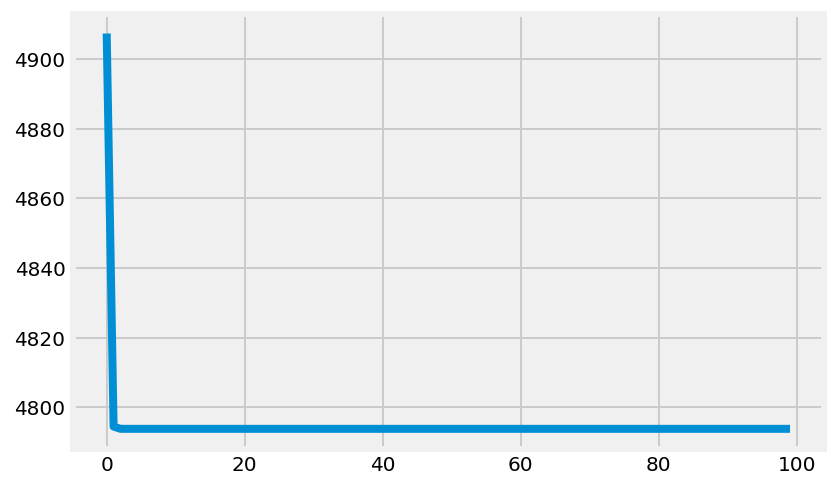

In [164]:
plt.plot(MSE)

<a id='linalg'></a>

## Linear Algebra MLR Generalization of the Gradient Descent Code

---

Now that we've coded the gradient descent for a simple linear regression, we can generalize this code to work for a matrix of predictors instead of just one. 

### New Mean Squared Error Loss Function

This function calculates the mean of the squared errors using a [dot product](http://mathworld.wolfram.com/DotProduct.html) between the `X` predictor matrix and the `beta_array`.

In [172]:
def mean_squared_error(X, y, beta_array):
    y_hat = np.dot(X, beta_array)
    mean_sq_err = np.mean((y_true - y_hat)**2)
    return mean_sq_err

### New $\beta$ Update Function

This will update the value of $\beta$ array. We still use the partial derivative formulas above, with some linear algebra tweaks to make it work with an arbitrary $X$ predictor matrix.

In [173]:
def beta_update_function(X, y, beta_array, step_size):
    # Create a transposed version of the X predictor array.
    Xt = X.T
    
    # Predictions are the dot product of the X matrix and beta matrix.
    y_hat = np.dot(X, beta_array)
    
    # Residuals are the true y minus the predicted y.
    residuals = y_hat - y
    
    # Calculate the gradient from the partial derivatives.
    # This actually does both at the same time.
    # How? Because the beta0 column is all 1s, the 
    # dot product turns out to be the same as the beta0
    # partial derivative function.
    gradient = np.dot(Xt, residuals) / (X.shape[0]/2.)
    
    # Update the betas with the gradient.
    beta_array = beta_array - (step_size * gradient)
    
    return beta_matrix

### New Gradient Descent Iteration Update Function

This is the function that wraps the gradient update with some number of iterations. It's the same except it takes an array of beta coefficients.

In [174]:
def run_gradient_descent(X, y, initial_beta_array, step_size, iterations=500):
    
    beta_array = initial_beta_array
    
    # Set up the MSE tracker.
    mses = []
    mses.append(mean_squared_error(X, y, beta_array))
    
    # Track the betas over the iterations.
    beta_arrays = []

    # Update the betas via gradient descent.
    for i in range(iterations):
        beta_array = beta_update_function(X, y, beta_array, step_size)
        mses.append(mean_squared_error(X, y, beta_array))
        beta_arrays.append(beta_array)

<a id='interactive'></a>

## Interactive Visualization of Gradient Descent

This interactive visualization lets you watch gradient descent solve the optimal coefficient values.

> **Note:** Because this is a simple implementation, there's no automatic adjustment of step size, so setting this value can be finicky and you'll have to play around with it.

In [175]:
import imp
plotter = imp.load_source('plotter', './code/gradient_descent.py')
from plotter import GradientDescentPlotter

gd_plotter = GradientDescentPlotter(step_size=0.001)
gd_plotter.run_gradient_descent(iterations=5000)
gd_plotter.gradient_interact()

interactive(children=(IntSlider(value=0, description=u'Iteration:', max=5000), Output()), _dom_classes=('widget-interact',))

<a id='fail'></a>

## Gradient Descent Can Fail: A Toy Example

---

One of the most delicate things about gradient descent is the step size (also known as learning rate). If it's not tuned properly, the algorithm may never converge and may explode into extreme values.

But that's not the only pitfall with gradient descent. It can also get stuck in "local minima" and only works where there's a gradient to follow. 

Here's a toy example of a function where gradient descent will fail:

$$f(x, y) = \begin{cases}
2 x^2 & \quad \text{if $x \leq 1$}\\
2  & \quad \text{else}
\end{cases}$$

In [170]:
# def func(x):
#     if x <= 1:
#         return 2 * x * x
#     return 2

# def gradient(x):
#     if x <= 1:
#         return 4 * x
#     return 0

# def gradient_descent(x, l=0.1):
#     vector = np.array(x)
#     return vector - l * np.array(gradient(x))


# def iterate(x0, n=10):
#     xs = [x0]
#     ys = [func(x0)]
#     for i in range(n):
#         x = gradient_descent(xs[-1], l=0.1)
#         xs.append(x)
#         ys.append(func(x))
#     return xs, ys

**Run the gradient descent algorithm starting at `x = -1.5` first, then try it at `x = 2`.**

In [171]:
# xs = np.arange(-2, 3, 0.1)
# ys = map(func, xs)

# plt.figure(figsize=(10,8))
# plt.plot(xs, ys, alpha=0.5, ls='dashed')

# # Start gradient descent at x = -1.5.
# xs2, ys2 = iterate(-1.5, n=10)
# plt.scatter(xs2, ys2, c='r', s=100)

# # Start gradient descent at x = 2.
# xs2, ys2 = iterate(2, n=10)
# plt.scatter(xs2, ys2, c='y', s=300)

<a id='stochastic'></a>
## Stochastic Gradient Descent

---

What is the difference between gradient descent and *stochastic* gradient descent? It's actually very small, but it has big implications.

Instead of **all** the samples updating the gradient at a time, **only one** sample updates the gradient within each overall iteration (iterating over all the observations, although this can change based on specification).

**Stochastic gradient descent has some advantages over gradient descent:**
- It solves faster, as it immediately starts to update the gradient.
- It can handle much larger data sets, as it only needs to calculate a single row or small batch of rows of the entire data set.

When using scikit-learn, there are only implementations of stochastic gradient descent solvers: `SGDRegressor` and `SGDClassifier`.